## 2.2 AIExp and AIMSH
Here, specifically

In [ ]:
class AStarExp(AIModule):

  def heuristic(self, v, v_height, end, end_height):
    
    chebychev = max(abs(end.x - v.x), abs(end.y - v.y), abs(end_height-v_height))
		
    if end_height > v_height :
      return (math.e) * (end_height - v_height) 
		
    if end_height < v_height :
      return math.pow(math.e,(end_height - v_height)/chebychev) * (chebychev) 
		
    if end_height == v_height :
      return 0
	
  def createPath(self, map_):
    
    q = PriorityQueue()
    cost = {}
    prev = {}
    explored = {}
		# Dictionary initialization
    for i in range(map_.width):
      for j in range(map_.length):
        cost[(i,j)] = math.inf
        prev[(i,j)] = None
        explored[(i,j)] = False
    current_point = deepcopy(map_.start)
    # set a variable equal to the end goal location
    end = map_.getEndPoint() 
    current_point.comparator = 0
    cost[(current_point.x, current_point.y)] = 0
		# Add start node to the queue
    q.put(current_point)
		# Search loop
    while q.qsize() > 0:
			# Get new point from PQ
      v = q.get()
      explored[(v.x,v.y)] = True
			# Check if popping off goal
      if v == map_.getEndPoint():
        break
			# Evaluate neighbors
      neighbors = map_.getNeighbors(v)
      for neighbor in neighbors:
        alt = map_.getCost(v, neighbor) + cost[(v.x,v.y)]
        if alt < cost[(neighbor.x,neighbor.y)]:
          cost[(neighbor.x,neighbor.y)] = alt 
          end_height = map_.getTile(end.x,end.y)
          v_height = map_.getTile(v.x,v.y)
          neighbor.comparator = alt + self.heuristic(v, v_height, end, end_height)
          prev[(neighbor.x,neighbor.y)] = v
        q.put(neighbor)
		
    # Find and return path
    path = []
    while v != map_.getStartPoint():
      path.append(v)
      v = prev[(v.x,v.y)]
    path.append(map_.getStartPoint())
    path.reverse()
    return path

In [ ]:
class AStarDiv(AIModule):

  def heuristic(self,alt,v,v_height,end,end_height):
    
    chebychev = max(abs(end.x - v.x), abs(end.y - v.y), abs(end_height-v_height))
    return alt + chebychev
	
  def createPath(self, map_):
    
    q = PriorityQueue()
    cost = {}
    prev = {}
    explored = {}
		
    # Dictionary initialization
    for i in range(map_.width):
      for j in range(map_.length):
        cost[(i,j)] = math.inf
        prev[(i,j)] = None
        explored[(i,j)] = False
    current_point = deepcopy(map_.start)
    current_point.comparator = 0
    cost[(current_point.x, current_point.y)] = 0
		# Add start node to the queue
    q.put(current_point)
		# Search loop
    while q.qsize() > 0:
			# Get new point from PQ
      v = q.get()
			#if explored[(v.x,v.y)]:
				#continue
      explored[(v.x,v.y)] = True
			# Check if popping off goal
      if v == map_.getEndPoint():
        break
			# Evaluate neighbors
      neighbors = map_.getNeighbors(v)
      for neighbor in neighbors:
        alt = map_.getCost(v, neighbor) + cost[(v.x,v.y)]
        if alt < cost[(neighbor.x,neighbor.y)]:
          cost[(neighbor.x,neighbor.y)] = alt # = g(n)
          # f(n) = g(n) + h(n)
          end = map_.getEndPoint()
          end_height = map_.getTile(end.x,end.y)
          v_height = map_.getTile(v.x,v.y)
          neighbor.comparator = self.heuristic(alt,v,v_height,end,end_height)
          prev[(neighbor.x,neighbor.y)] = v
        q.put(neighbor)
		
    # Find and return path
    path = []
    while v != map_.getStartPoint():
      path.append(v)
      v = prev[(v.x,v.y)]
    path.append(map_.getStartPoint())
    path.reverse()
    return path

In [ ]:
# Attempt at Bi-directional Search
#class AStarMSH(AIModule):
  
  def heuristicGoingUp(self, v, v_height, end, end_height):
    chebychev = max(abs(end.x - v.x), abs(end.y - v.y))
    if end_height > v_height :
      return (math.e) * (end_height - v_height) 
    if end_height < v_height :
      return math.pow(math.e,(end_height - v_height)/chebychev) * (chebychev)
    if end_height == v_height :
      return chebychev

  def heuristicGoingDown(self, w, w_height, start, start_height):
    chebychev = max(abs(start.x - w.x), abs(start.y - w.y))
    if start_height > w_height :
      return ((math.e) * ( w_height - start_height)) 
    if start_height < w_height :
      return math.pow(math.e,(w_height - start_height)/chebychev) * (chebychev) 
    if start_height == w_height :
      return chebychev
  
  def createPath(self, map_):
    q_start = PriorityQueue()
    q_end = PriorityQueue()
    cost_start = {}
    cost_end = {}
    prev_start = {}
    prev_end = {}
    explored_start = {}
    explored_end = {}
    
    for i in range(map_.width):
      for j in range(map_.length):
        cost_start[(i,j)] = math.inf
        cost_end[(i,j)] = math.inf
        prev_start[(i,j)] = None
        prev_end[(i,j)] = None
        explored_start[(i,j)] = False
        explored_end[(i,j)] = False
    
    start = map_.getStartPoint()
    end = map_.getEndPoint() 
    
    start.comparator = 0
    cost_start[(start.x, start.y)] = 0
    q_start.put(map_.getStartPoint())
    
    end.comparator = 0
    cost_end[(end.x, end.y)] = 0
    q_end.put(map_.getEndPoint())
    
    while q_start.qsize() > 0 and q_end.qsize() > 0:
      if (q_start.qsize()) > (q_end.qsize()):
        w = q_end.get()
        explored_end[(w.x, w.y)] = True
        if (w.x , w.y) in explored_start:
          break
        neighbors = map_.getNeighbors(w)
        for neighbor in neighbors:
          alt = cost_end[(w.x, w.y)] + map_.getCost(w, neighbor)
          if alt < cost_end[(neighbor.x, neighbor.y)]:
            cost_end[(neighbor.x, neighbor.y)] = alt
            start_height = map_.getTile(start.x, start.y)
            w_height = map_.getTile(w.x, w.y)
            neighbor.comparator = alt + self.heuristicGoingDown(w, w_height, start, start_height)
            prev_end[(neighbor.x, neighbor.y)] = w
          q_end.put(neighbor)
      else:
        v = q_start.get()
        explored_start[(v.x, v.y)] = True
        if (v.x , v.y) in explored_end:
          break
        neighbors2 = map_.getNeighbors(v)
        for neighbor2 in neighbors2:
          alt2 = cost_start[(v.x, v.y)] + map_.getCost(v, neighbor2)
          if alt2 < cost_start[(neighbor2.x, neighbor2.y)]:
            cost_start[(neighbor2.x, neighbor2.y)] = alt2
            end_height = map_.getTile(end.x, end.y)
            v_height = map_.getTile(v.x, v.y)
            neighbor.comparator2 = alt2 + self.heuristicGoingUp(v, v_height, end, end_height)
            prev_start[(neighbor2.x, neighbor2.y)] = v
          q_start.put(neighbor2)

    # Find and return path
    path = []
    path2 = []
    
    while v != map_.getStartPoint():
      path.append(v)
      v = prev_start[(v.x,v.y)]

    path.append(map_.getStartPoint())
    
    while w != map_.getEndPoint():
      path2.append(w)
      w = prev_end[(w.x,w.y)]

    path2.append(map_.getEndPoint())
    path.reverse()
    final_path = path + path2

    return final_path

In [ ]:
class AStarMSH(AIModule):

  def heuristic(self, v, v_height, end, end_height):
    
    chebychev = max(abs(end.x - v.x), abs(end.y - v.y), abs(end_height-v_height))
		
    if end_height > v_height :
      return (math.e) * (end_height - v_height) 
		
    if end_height < v_height :
      return math.pow(math.e,(end_height - v_height)/chebychev) * (chebychev) 
		
    if end_height == v_height :
      return 0
	
  def createPath(self, map_):
    
    q = PriorityQueue()
    cost = {}
    prev = {}
    explored = {}
		# Dictionary initialization
    for i in range(map_.width):
      for j in range(map_.length):
        cost[(i,j)] = math.inf
        prev[(i,j)] = None
        explored[(i,j)] = False
    current_point = deepcopy(map_.start)
    # set a variable equal to the end goal location
    end = map_.getEndPoint() 
    current_point.comparator = 0
    cost[(current_point.x, current_point.y)] = 0
		# Add start node to the queue
    q.put(current_point)
		# Search loop
    while q.qsize() > 0:
			# Get new point from PQ
      v = q.get()
      explored[(v.x,v.y)] = True
			# Check if popping off goal
      if v == map_.getEndPoint():
        break
			# Evaluate neighbors
      neighbors = map_.getNeighbors(v)
      for neighbor in neighbors:
        alt = map_.getCost(v, neighbor) + cost[(v.x,v.y)]
        if alt < cost[(neighbor.x,neighbor.y)]:
          cost[(neighbor.x,neighbor.y)] = alt 
          end_height = map_.getTile(end.x,end.y)
          v_height = map_.getTile(v.x,v.y)
          neighbor.comparator = alt + (1.15) * self.heuristic(v, v_height, end, end_height)
          prev[(neighbor.x,neighbor.y)] = v
        q.put(neighbor)
		
    # Find and return path
    path = []
    while v != map_.getStartPoint():
      path.append(v)
      v = prev[(v.x,v.y)]
    path.append(map_.getStartPoint())
    path.reverse()
    return path

## 3.2 Run

Time (s):  14.755589485168457
Path cost: 241.55253710831192
Nodes explored:  158676


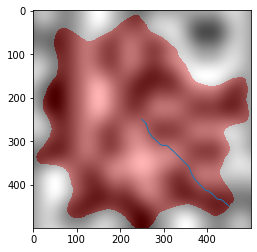

In [ ]:
m = Map(w,l, seed=seed, cost_function = cost_function, filename=filename,
        start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

# 4. Tests

## 4.1 AStarExp

In [ ]:
cost_function = 'exp'

Time (s):  2.918487548828125
Path cost: 241.55253710831192
Nodes explored:  21238


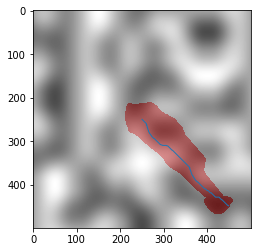

In [ ]:
w = 500
l = 500
start = None
goal = None
seed = 0
# Change to AStarExp() after implemented
AI = AStarExp()
filename = None

m = Map(w,l, seed=seed, cost_function = cost_function, filename=filename,
        start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

Time (s):  7.477592468261719
Path cost: 238.5060683830129
Nodes explored:  14033


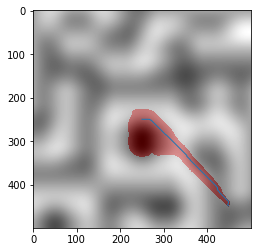

In [ ]:
seed = 1

m = Map(w,l, seed=seed, filename=filename, start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

Time (s):  11.16479206085205
Path cost: 236.667690049357
Nodes explored:  17749


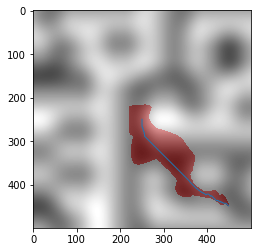

In [ ]:
seed = 2

m = Map(w,l, seed=seed, filename=filename, start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

Time (s):  24.210431814193726
Path cost: 422.01798243905006
Nodes explored:  121154


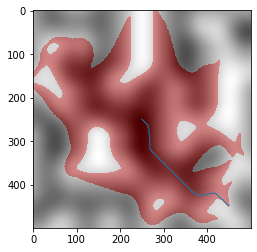

In [ ]:
seed = 3

m = Map(w,l, seed=seed, filename=filename, start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

Time (s):  3.1957690715789795
Path cost: 254.34464507852198
Nodes explored:  20909


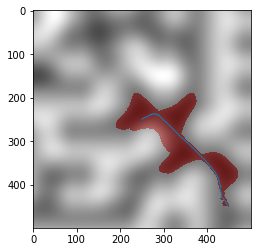

In [ ]:
seed = 4

m = Map(w,l, seed=seed, filename=filename, start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

## 4.1 AStarDiv

In [ ]:
cost_function = 'div'

Time (s):  0.3734874725341797
Path cost: 197.67690128917357
Nodes explored:  1683


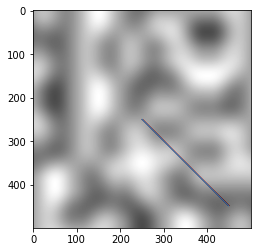

In [ ]:
w = 500
l = 500
start = None
goal = None
seed = 0
# Change to AStarDiv() after implemented
AI = AStarDiv()
filename = None

m = Map(w,l, seed=seed, cost_function = cost_function, filename=filename,
        start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

Time (s):  0.27199387550354004
Path cost: 197.71721595331226
Nodes explored:  1623


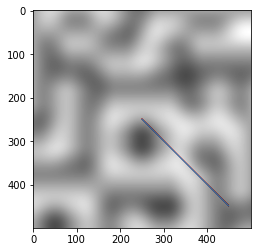

In [ ]:
seed = 1

m = Map(w,l, seed=seed, cost_function = cost_function, filename=filename,
        start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

Time (s):  0.34056901931762695
Path cost: 197.58110211547168
Nodes explored:  1660


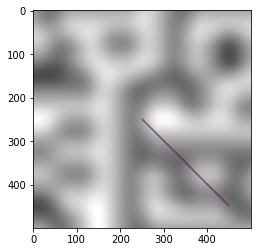

In [ ]:
seed = 2

m = Map(w,l, seed=seed, cost_function = cost_function, filename=filename,
        start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

Time (s):  0.3044400215148926
Path cost: 196.29556836229682
Nodes explored:  1584


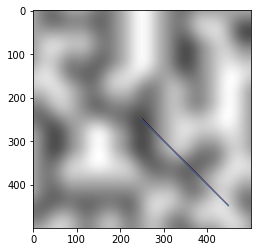

In [ ]:
seed = 3

m = Map(w,l, seed=seed, cost_function = cost_function, filename=filename,
        start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

Time (s):  0.3685638904571533
Path cost: 197.24829713437708
Nodes explored:  1649


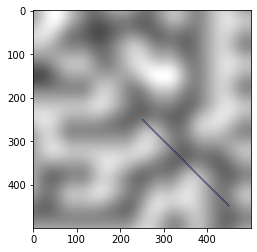

In [ ]:
seed = 4

m = Map(w,l, seed=seed, cost_function = cost_function, filename=filename,
        start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)

## 4.2 MSH

Time (s):  62.13406848907471
Path cost: 515.3828623299908
Nodes explored:  101197


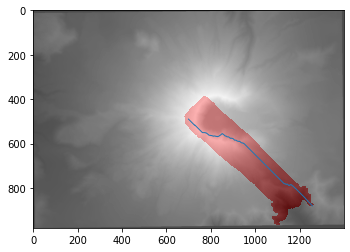

In [ ]:
w = 500
l = 500
start = None
goal = None
seed = 0
# Change to AStarMSH() after implemented
AI = AStarMSH()
# Change to the filepath on your drive
filename = "/content/gdrive/My Drive/AI/msh.npy"

m = Map(w,l, seed=seed, filename=filename, start=start, goal=goal)
t1 = time()
path = AI.createPath(m)
t2 = time()
print('Time (s): ', t2-t1)
m.createImage(path)